## Ejercicio 1.

Carga y Exploración de Datos

Objetivo: Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

Acciones:
Cargar el archivo Noticias.xlsx que contiene las noticias.

Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

Contexto: La columna Etiqueta en el conjunto de datos contiene categorías, algunas no especializadas o no tienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.

In [27]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# Cargar el archivo de datos
file_path = '../Datos/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

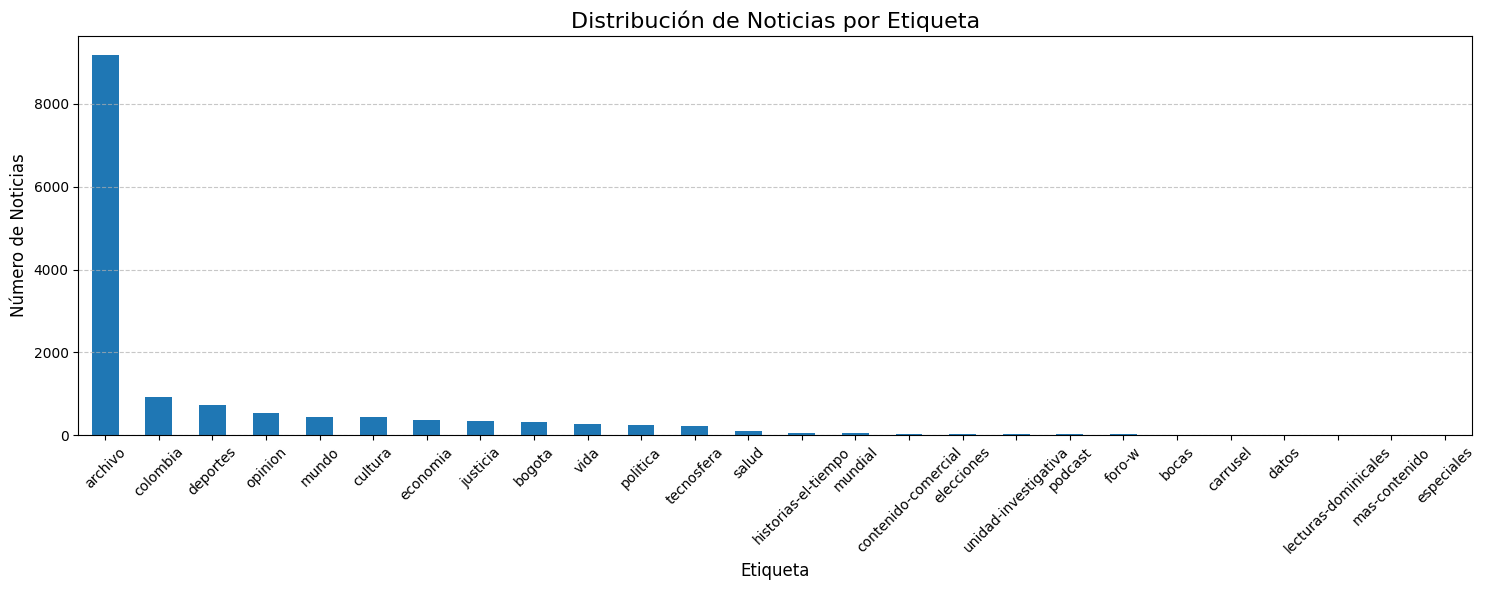

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

In [29]:
# Calcular la distribución de la columna 'Etiqueta'
etiqueta_distribution = data['Etiqueta'].value_counts()

# Graficar la distribución como un gráfico de barras
plt.figure(figsize=(15, 6))  # Configurar el tamaño de la figura
etiqueta_distribution.plot(kind='bar')  # Crear el gráfico de barras
plt.title('Distribución de Noticias por Etiqueta', fontsize=16)  # Título del gráfico
plt.xlabel('Etiqueta', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Número de Noticias', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para el eje Y
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar solapamientos
plt.show()  # Mostrar el gráfico

# Mostrar los conteos de noticias por etiqueta
etiqueta_distribution

Etiqueta dominante: La etiqueta "archivo" tiene una cantidad significativamente mayor de noticias en comparación con cualquier otra categoría. Esto indica que la mayoría del contenido en el dataset pertenece a esta etiqueta.

Categorías secundarias: Las etiquetas como "colombia", "deportes", y "opinion" son las más frecuentes después de "archivo", pero están mucho menos representadas, mostrando una gran disparidad en la distribución.

Otras: Hay muchas etiquetas con pocas noticias asociadas (frecuencia baja), lo que sugiere que el contenido está concentrado en unas pocas categorías principales.

Categorías relevantes (deportes, cultura, economía, justicia):

Estas categorías tienen una representación significativa, aunque menor en comparación con "archivo".
Son temas especializados que permiten realizar análisis más específicos, como la identificación de patrones dentro de áreas temáticas (deportes) o el análisis económico basado en contenido de noticias.

## Ejercicio 2

Filtrado de Datos

Objetivo: Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

Acciones:

Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.

Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Contexto: Es importante filtrar los datos para enfocarnos en temas especializados porque algunas categorías pueden tener un discurso amplio y no se tratan de un tema especializado. Esto ayuda a mejorar la precisión del modelo al enfocarse en categorías bien definidas.

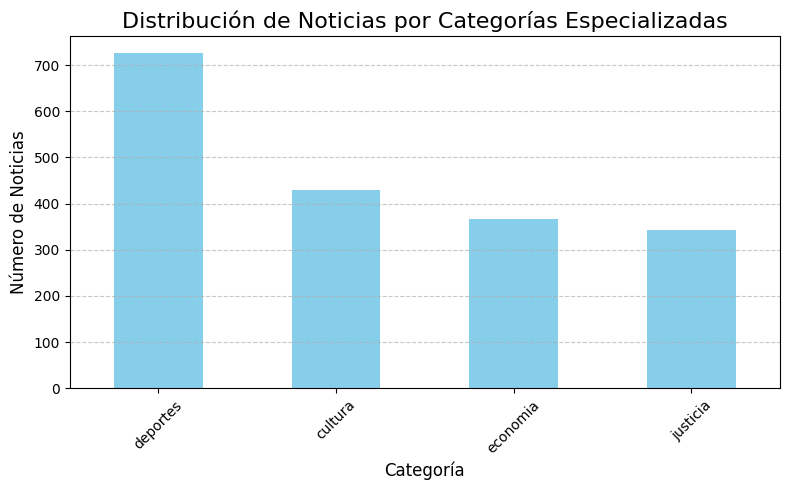

In [30]:
# Filtrar noticias por categorías relevantes excluyendo "archivo" y otras irrelevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
datos_filtrados = data[data['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías filtradas
distribucion_filtrada = datos_filtrados['Etiqueta'].value_counts()

# Visualizar la distribución de las categorías filtradas
plt.figure(figsize=(8, 5))
distribucion_filtrada.plot(kind='bar', color='skyblue')
plt.title('Distribución de Noticias por Categorías Especializadas', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [31]:
datos_filtrados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
10487,10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura
10488,10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura
10489,10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura
10490,10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura
10491,10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura
...,...,...,...,...,...,...
12467,12467,https://www.eltiempo.com/justicia/servicios/po...,Más de 70 mil policías apoyan jornada de aisla...,Miisterio de Defensa activó dispositivo especi...,"El ministro de la Defensa, Carlos Holmes Truj...",justicia
12468,12468,https://www.eltiempo.com/justicia/servicios/pr...,Habrá proyecto conjunto para superar la crisis...,Se revisarán “conductas antisociales” que se h...,Después de varios contrapunteos sobre la mejor...,justicia
12469,12469,https://www.eltiempo.com/justicia/servicios/qu...,¿Qué hacer en caso de un accidente de tránsito...,EL TIEMPO y la Unilibre responden a esta y otr...,El TIempo y la Universidad Libre se aliaron pa...,justicia
12470,12470,https://www.eltiempo.com/justicia/servicios/su...,Otorgan subsidios a tres obreros del edificio ...,También la esposa de una de las víctimas recib...,Tres trabajadores del edificio Portales Blas d...,justicia


### Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Submuestreo: Si las categorías tienen diferentes cantidades de datos, se toma la misma cantidad que la categoría con menos datos, eliminando registros sobrantes de las categorías más grandes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26084\264665382.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


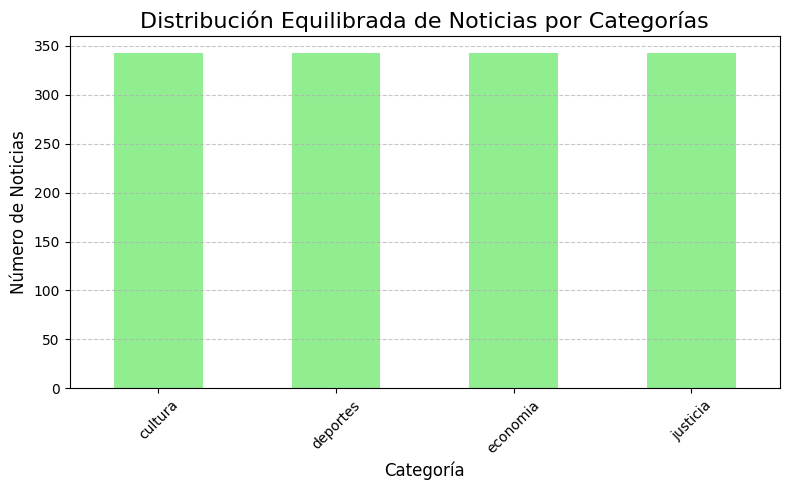

Etiqueta
cultura     343
deportes    343
economia    343
justicia    343
Name: count, dtype: int64


In [32]:
# Identificar el tamaño mínimo entre las categorías
min_count = datos_filtrados['Etiqueta'].value_counts().min()

# Submuestrear cada categoría para que todas tengan la misma cantidad de datos
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribución equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribución equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightgreen')
plt.title('Distribución Equilibrada de Noticias por Categorías', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribución en la consola
print(distribucion_balanceada)


In [33]:
datos_filtrados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
10487,10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura
10488,10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura
10489,10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura
10490,10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura
10491,10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura
...,...,...,...,...,...,...
12467,12467,https://www.eltiempo.com/justicia/servicios/po...,Más de 70 mil policías apoyan jornada de aisla...,Miisterio de Defensa activó dispositivo especi...,"El ministro de la Defensa, Carlos Holmes Truj...",justicia
12468,12468,https://www.eltiempo.com/justicia/servicios/pr...,Habrá proyecto conjunto para superar la crisis...,Se revisarán “conductas antisociales” que se h...,Después de varios contrapunteos sobre la mejor...,justicia
12469,12469,https://www.eltiempo.com/justicia/servicios/qu...,¿Qué hacer en caso de un accidente de tránsito...,EL TIEMPO y la Unilibre responden a esta y otr...,El TIempo y la Universidad Libre se aliaron pa...,justicia
12470,12470,https://www.eltiempo.com/justicia/servicios/su...,Otorgan subsidios a tres obreros del edificio ...,También la esposa de una de las víctimas recib...,Tres trabajadores del edificio Portales Blas d...,justicia


In [34]:
datos_balanceados

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura
...,...,...,...,...,...,...
1367,12317,https://www.eltiempo.com/justicia/investigacio...,Llamado a interrogatorio por Hidroituango es e...,"Álvaro Villegas Moreno, citado por la Fiscalía...",Dentro de los llamados a a declarar por la Fi...,justicia
1368,12200,https://www.eltiempo.com/justicia/cortes/conse...,Consejo de Estado negó demanda por $ 4 mil mil...,Los demandantes aludían afectación patrimonial...,Cuatro comisionistas de bolsa que laboraron en...,justicia
1369,12235,https://www.eltiempo.com/justicia/cortes/proye...,Con cooperación internacional mejorarán educac...,Proyecto de cooperación con EE. UU. fortalecer...,Con el apoyo de la Embajada de los Estados Uni...,justicia
1370,12399,https://www.eltiempo.com/justicia/investigacio...,Las claves de la histórica jornada electoral d...,La mayor participación obedece a los efectos d...,Como ha sido la constante desde el 2002 –con l...,justicia


## Ejercicio 3

Preprocesamiento de Texto

Objetivo: Preparar los datos textuales para el entrenamiento del modelo.

Acciones:

Convertir todo el texto a minúsculas para uniformidad.

Eliminar puntuación y números para reducir el ruido en los datos.

Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

Tokenizar el texto, es decir, dividir el texto en palabras individuales.

Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

### Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [36]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.
    5. Elimina comilla simple (preguntar la profe si se deja esta funcionalidad jcc)

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    #Eliminar comillas simple  ‘
    text = text.translate(str.maketrans('', '', "‘"))
     #Eliminar comillas simple  ’
    text = text.translate(str.maketrans('', '', "’"))
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
datos_balanceados = datos_balanceados.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
datos_balanceados['contenido_preprocesado'] = datos_balanceados['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(datos_balanceados[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {datos_balanceados.shape}')

,contenido,contenido_preprocesado
0,"Siendo un niño, ‘El Sol de México’ se convirti...",siendo un niño el sol de méxico se convirtió e...
1,Las películas de Víctor Gaviria constituyen un...,las películas de víctor gaviria constituyen un...
2,"Del inagotable repertorio de las salsas, no cr...",del inagotable repertorio de las salsas no cre...
3,"La Casa 1537, ubicada en la calle del Colegio ...",la casa ubicada en la calle del colegio del c...
4,"Judas Priest, la banda británica fundamental e...",judas priest la banda británica fundamental en...


Dimensiones de los datos: (1371, 7)


In [37]:
# Se visualizan todas las columnas del data set
datos_balanceados

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...
...,...,...,...,...,...,...,...
1367,12317,https://www.eltiempo.com/justicia/investigacio...,Llamado a interrogatorio por Hidroituango es e...,"Álvaro Villegas Moreno, citado por la Fiscalía...",Dentro de los llamados a a declarar por la Fi...,justicia,dentro de los llamados a a declarar por la fi...
1368,12200,https://www.eltiempo.com/justicia/cortes/conse...,Consejo de Estado negó demanda por $ 4 mil mil...,Los demandantes aludían afectación patrimonial...,Cuatro comisionistas de bolsa que laboraron en...,justicia,cuatro comisionistas de bolsa que laboraron en...
1369,12235,https://www.eltiempo.com/justicia/cortes/proye...,Con cooperación internacional mejorarán educac...,Proyecto de cooperación con EE. UU. fortalecer...,Con el apoyo de la Embajada de los Estados Uni...,justicia,con el apoyo de la embajada de los estados uni...
1370,12399,https://www.eltiempo.com/justicia/investigacio...,Las claves de la histórica jornada electoral d...,La mayor participación obedece a los efectos d...,Como ha sido la constante desde el 2002 –con l...,justicia,como ha sido la constante desde el –con la so...


### Tokenizar el texto, es decir, dividir el texto en palabras individuales.

In [38]:
# Tokenización
datos_balanceados['tokens'] = datos_balanceados['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
datos_balanceados[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co..."
1,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu..."
2,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,..."
3,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi..."
4,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen..."


In [39]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", datos_balanceados['contenido_preprocesado'][0])
print("Tokens: ", datos_balanceados['tokens'][0])

Contenido preprocesado:  siendo un niño el sol de méxico se convirtió en un auténtico fenómeno en méxico que pronto arrasó en toda latinoamérica marcando a generaciones enteras  una estrella que luego de años de bache en su carrera regresó a la popularidad gracias a la serie basada en su vida empezó a cantar con apenas diez años y pronto se convirtió en todo un fenómeno en méxico y en una de las grandes voces de la canción romántica tanto es así que aún no había cumplido quince años cuando recibió su primer grammy  por la canción me gustas tal como eres que interpretó a dúo con la escocesa sheena easton hoy tras cuatro décadas de carrera sigue siendo uno de los grandes representantes de la música mexicana y latina en el mundo “muy temprano luis miguel deja de ser un niño para ser un trabajador y uno sometido a una disciplina muy tenaz y claro eso le ha marcado su vida completamente en los aspectos positivos como desarrollar una carrera sólida tanto en los negativos como haberse visto p

### Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

In [40]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
datos_balanceados['tokens_sin_stopwords'] = datos_balanceados['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
datos_balanceados[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti..."
1,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí..."
2,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda..."
3,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór..."
4,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,..."


In [41]:
datos_balanceados.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens,tokens_sin_stopwords
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti..."
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí..."
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda..."
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór..."
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,..."


### Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

#### con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
ojo: revise y el profe la deja asi para usar la varaible para la divion de datos.

In [42]:
# con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(datos_balanceados['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#print(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a índices numéricos
sequences = tokenizer.texts_to_sequences(datos_balanceados['tokens_sin_stopwords'])

# Paso 3: Aplicar padding y guardar en la variable padded_sequences
max_len = 50  # Longitud máxima para el padding 
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar los resultados
print(padded_sequences[:5])  # Muestra las primeras 5 secuencias con padding


[[28 14 43 36 45 37 17 29 40 23  7 21  6  1 31 30 38 25 26 44 41  2 11 24
  49  6  1 33  9 27 19  8 46 12  2  1 34 39 32 13  5 18  1 42 10 15 16 47
   5 35]
 [28 14 43 36 45 37 17 29 40 23  7 21  6  1 31 30 38 25 26 44 41  2 11 24
  49  6  1 33  9 27 19  8 46 12  2  1 34 39 32 13  5 18  1 42 10 15 16 47
   5 35]
 [28 14 43 36 45 37 17 29 40 23  7 21  6  1 31 30 38 25 26 44 41  2 11 24
  49  6  1 33  9 27 19  8 46 12  2  1 34 39 32 13  5 18  1 42 10 15 16 47
   5 35]
 [28 14 43 36 45 37 17 29 40 23  7 21  6  1 31 30 38 25 26 44 41  2 11 24
  49  6  1 33  9 27 19  8 46 12  2  1 34 39 32 13  5 18  1 42 10 15 16 47
   5 35]
 [28 14 43 36 45 37 17 29 40 23  7 21  6  1 31 30 38 25 26 44 41  2 11 24
  49  6  1 33  9 27 19  8 46 12  2  1 34 39 32 13  5 18  1 42 10 15 16 47
   5 35]]


In [43]:
datos_balanceados.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens,tokens_sin_stopwords
0,10909,https://www.eltiempo.com/cultura/musica-y-libr...,"Luis Miguel, 50 años de un sol sin ocaso",'El Sol de México' cumple 50 años. Su historia...,"Siendo un niño, ‘El Sol de México’ se convirti...",cultura,siendo un niño el sol de méxico se convirtió e...,"[siendo, un, niño, el, sol, de, méxico, se, co...","[siendo, niño, sol, méxico, convirtió, auténti..."
1,10562,https://www.eltiempo.com/cultura/cine-y-tv/cri...,Críticamente: Aquí y ahora,Las películas de Víctor Gaviria constituyen un...,Las películas de Víctor Gaviria constituyen un...,cultura,las películas de víctor gaviria constituyen un...,"[las, películas, de, víctor, gaviria, constitu...","[películas, víctor, gaviria, constituyen, capí..."
2,10664,https://www.eltiempo.com/cultura/gastronomia/c...,Mejor con chimichurri / El Caldero,¿Dónde encontrar esa buena salsa para aderezar...,"Del inagotable repertorio de las salsas, no cr...",cultura,del inagotable repertorio de las salsas no cre...,"[del, inagotable, repertorio, de, las, salsas,...","[inagotable, repertorio, salsas, creo, recorda..."
3,10517,https://www.eltiempo.com/cultura/arte-y-teatro...,Secretos coloniales de la Casa 1537 de Cartagena,"Este sitio, que fue catedral, colegio y hospit...","La Casa 1537, ubicada en la calle del Colegio ...",cultura,la casa ubicada en la calle del colegio del c...,"[la, casa, ubicada, en, la, calle, del, colegi...","[casa, ubicada, calle, colegio, centro, histór..."
4,10848,https://www.eltiempo.com/cultura/musica-y-libr...,"Judas Priest, Helloween y Kreator estarán en e...",El festival será el 26 de octubre en el Hipódr...,"Judas Priest, la banda británica fundamental e...",cultura,judas priest la banda británica fundamental en...,"[judas, priest, la, banda, británica, fundamen...","[judas, priest, banda, británica, fundamental,..."


## Ejercicio 4

División del Conjunto de Datos

Objetivo: Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

Acciones:

Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.

Asegurarse de que la división sea aleatoria, pero que mantenga una proporción similar de las categorías en ambos conjuntos.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Paso 1: Codificación de etiquetas
label_encoder = LabelEncoder()
datos_balanceados['Etiqueta_codificada'] = label_encoder.fit_transform(datos_balanceados['Etiqueta'])

# Paso 3: División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, 
    datos_balanceados['Etiqueta_codificada'], 
    test_size=0.2, 
    random_state=42, #Division aleatoria
    stratify=datos_balanceados['Etiqueta_codificada']  # Mantener proporciones
)

# Mostrar tamaño de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")


Tamaño del conjunto de entrenamiento: 1096
Tamaño del conjunto de validación: 275
